# Class 9

KNN Regressor & Linear Regression:
1. Import data set
2. Seperate x(Gender, Height) and y (y=Weight)
3. Train = 70%, Test = 30%
4. Apply Linear Regression
5. Evaluate Model (Accuracy, MSE, MAE)
6. Apply KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
7. Evaluate Model (Accuracy, MSE, Prediction)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/knn-dataset/weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df1=df.copy()
df2=df.copy()
df3=df.copy()
df4=df.copy()
df5=df.copy()
df6=df.copy()
df7=df.copy()
df8=df.copy()
df9=df.copy()
df10=df.copy()

<AxesSubplot: >

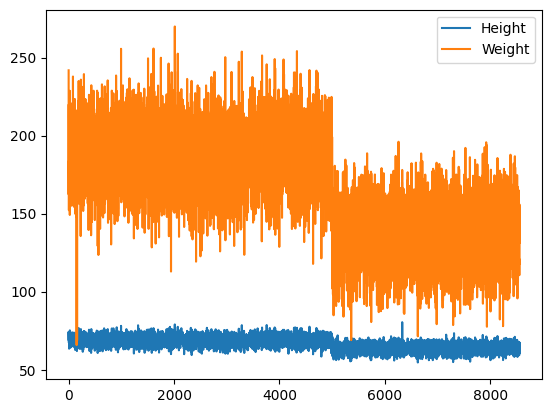

In [7]:
df.plot()

<AxesSubplot: ylabel='Height'>

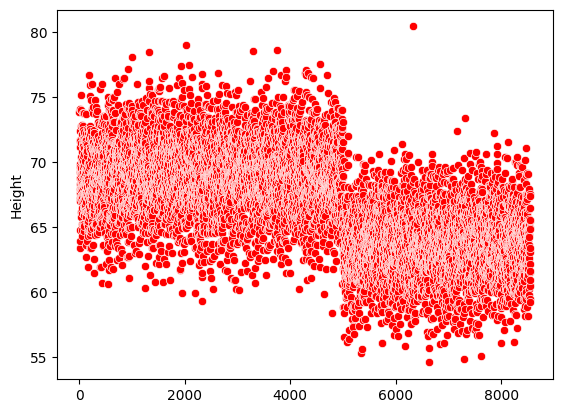

In [8]:
sns.scatterplot(df.Height,color='red')

<AxesSubplot: ylabel='Weight'>

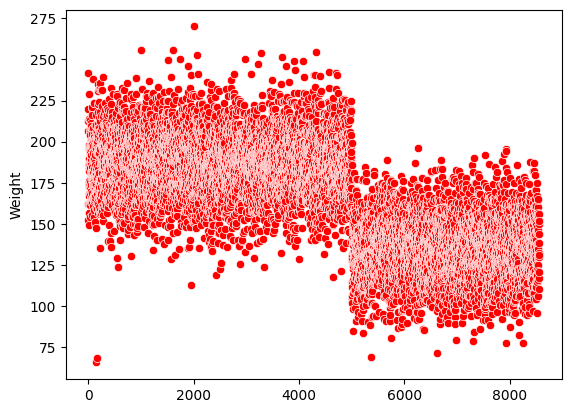

In [9]:
sns.scatterplot(df.Weight,color='red')

<AxesSubplot: xlabel='Height', ylabel='Weight'>

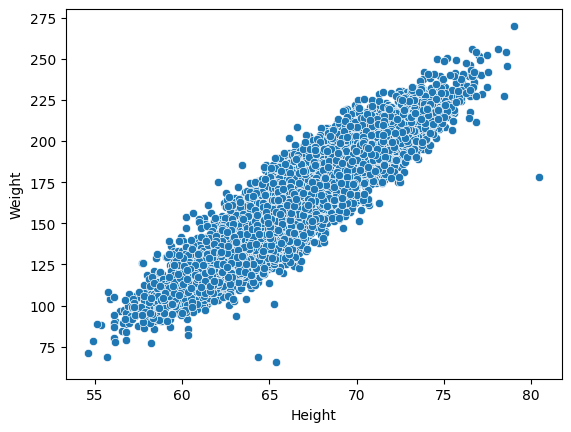

In [10]:
sns.scatterplot(x= df["Height"], y=df["Weight"])

<AxesSubplot: xlabel='Gender', ylabel='count'>

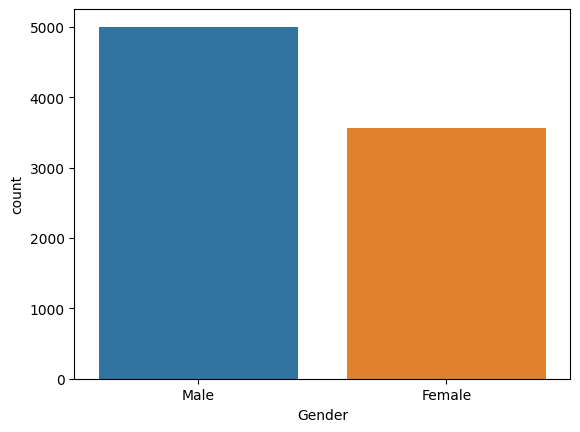

In [11]:
#sns.countplot(df['Gender'],data=df)
sns.countplot(x=df["Gender"] , data=df)

### Label encoding gender feature

In [12]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder 

In [13]:
le = LabelEncoder()

In [14]:
df1["Gender"] = le.fit_transform(df1["Gender"])

In [15]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [16]:
df1.shape

(8555, 3)

<AxesSubplot: xlabel='Gender', ylabel='count'>

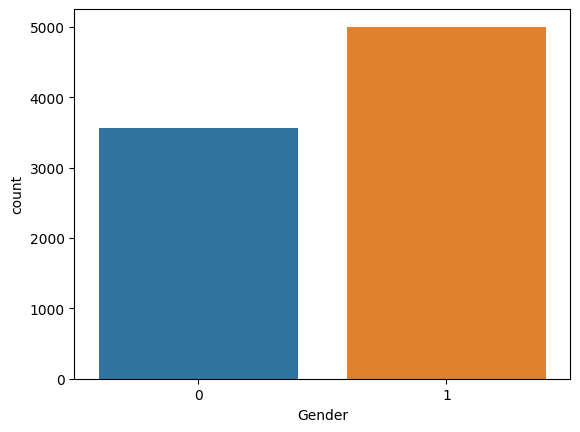

In [17]:
sns.countplot(x=df1['Gender'], data = df1)

## Standardization on Height feature

In [18]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
col = ['Height']
df1[col] = std.fit_transform(df1[col])
df1.head()

,Gender,Height,Weight
0,1,1.827233,241.893563
1,1,0.512039,162.310473
2,1,1.895545,212.740856
3,1,1.277788,220.042470
4,1,0.797634,206.349801


## Split data into train and test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# delete weight column and take it to y
X = df1.drop(['Weight'], axis=1)
Y = df1['Weight']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [21]:
print("--------------x_train----------------")
print(x_train.head())
print("--------------x_test----------------")
print(x_test.head())
print("--------------x_train----------------")
print(y_train.head())
print("--------------y_test----------------")
print(y_test.head())

--------------x_train----------------
      Gender    Height
1277       1  1.447687
5361       0 -1.518938
5728       0  0.599644
4276       1  0.379392
3112       1 -0.472192
--------------x_test----------------
      Gender    Height
7154       0 -0.452294
3258       1  1.042451
2188       1  0.481319
5609       0 -0.213520
3186       1  1.062397
--------------x_train----------------
1277    189.165592
5361    124.876796
5728    168.864403
4276    172.941248
3112    144.551044
Name: Weight, dtype: float64
--------------y_test----------------
7154    160.800726
3258    184.516688
2188    184.262796
5609    166.844114
3186    200.466282
Name: Weight, dtype: float64


## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) #test using values of x and keep in predicted y
y_pred

array([143.83013436, 197.53417989, 184.63515112, ..., 160.7078525 ,
       186.82852694, 201.4226542 ])

In [23]:
np.array(y_test)

array([160.8007256, 184.5166876, 184.2627962, ..., 153.4364809,
       170.3101222, 195.3926176])

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
print("MSE = ", mean_squared_error(y_test,y_pred)) # The mean squared error
print("MAE =", mean_absolute_error(y_test, y_pred)) # The mean absolute error
print ("Traning Accuracy: ", reg.score(x_train, y_train)*100) # Check training accuracy
print ("Testing Accuracy: ", reg.score(x_test, y_test)*100) # Check testing accuracy

MSE =  99.67250998070031
MAE = 7.98213259272913
Traning Accuracy:  89.72135459668118
Testing Accuracy:  90.5995960709116
